![SHU](https://drive.google.com/uc?export=view&id=1oauWClN3B2tjg1AeVHtfjAXZg13d9HXL)

#**Applied Measurement**
###Coputer Vision Crash Course

Balls are circles if they are not distorted or deformed. Here we look at code that can find circles. Take note of where in the code we blur the image and why and where we can set radius range.

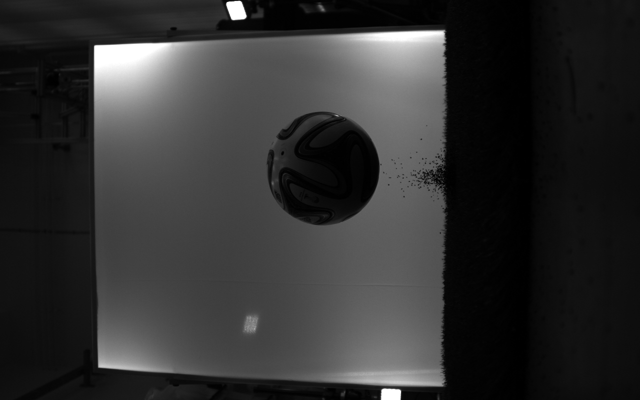

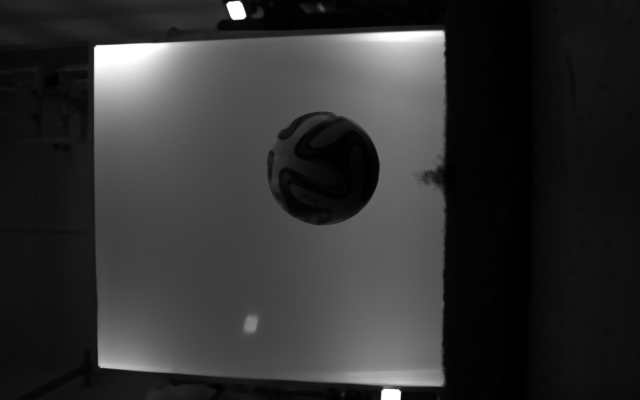

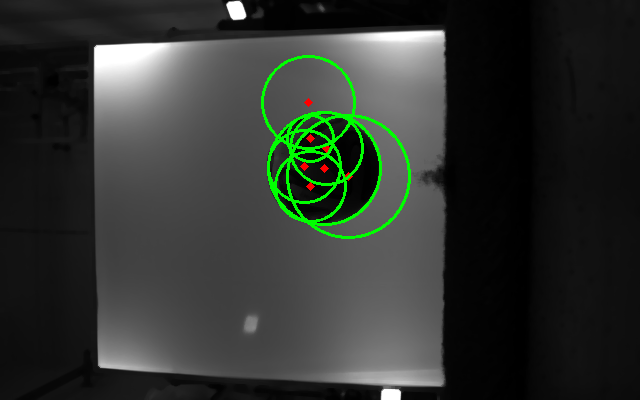

array([[[324, 168,  56],
        [348, 176,  61],
        [326, 148,  36],
        [304, 166,  36],
        [310, 186,  35],
        [308, 102,  46],
        [310, 138,  23]]], dtype=uint16)

In [50]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/sample_data/images/grey160.bmp', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

cv2_imshow(img)

img = cv.medianBlur(img,5)
cv2_imshow(img)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
circles

What about when they are deformed?

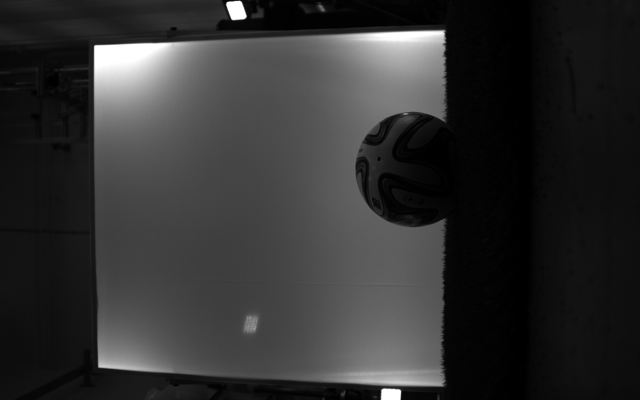

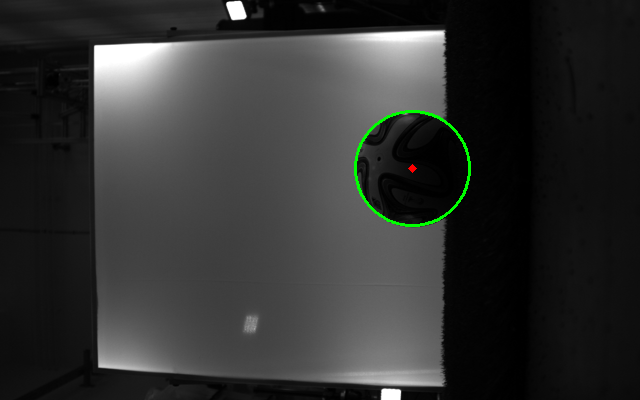

In [51]:
import numpy as np
import cv2 as cv
from google.colab.patches import cv2_imshow

img = cv.imread('/content/sample_data/images/grey110.bmp', cv.IMREAD_GRAYSCALE)

assert img is not None, "file could not be read, check with os.path.exists()"

cv2_imshow(img)

cimg = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
circles = cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=50,maxRadius=60)

circles = np.uint16(np.around(circles))

for i in circles[0,:]:
    # draw the outer circle
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)

Now can we turn this into a tracking algorithm?

In [53]:
import numpy as np
import cv2 as cv
import glob
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

images = glob.glob('/content/sample_data/images' + '/*.bmp')
images.sort()

for fname in images:
    pass

Can you create a tracking algorithm  that uses a different basic method? How about something that uses [background subtraction](https://docs.opencv.org/3.4/d8/d38/tutorial_bgsegm_bg_subtraction.html) and [blob detection](https://learnopencv.com/blob-detection-using-opencv-python-c/)? Or you could try a ready-made object tracker.

Alternatively, you could try to analyse something else. How about trying to quantify the amount of rubber crumb that 'splashes' from the surface after the impact?